In [1]:
import zipfile

In [2]:
with zipfile.ZipFile('archive (1).zip') as zip:
    zip.extractall()

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
import scipy.stats as stats
import matplotlib.ticker as mtick
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,r2_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

In [4]:
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.shape

(7043, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
data.drop(columns = 'customerID',inplace = True)

In [10]:
data['TotalCharges'] =pd.to_numeric(data['TotalCharges'],errors = 'coerce') 

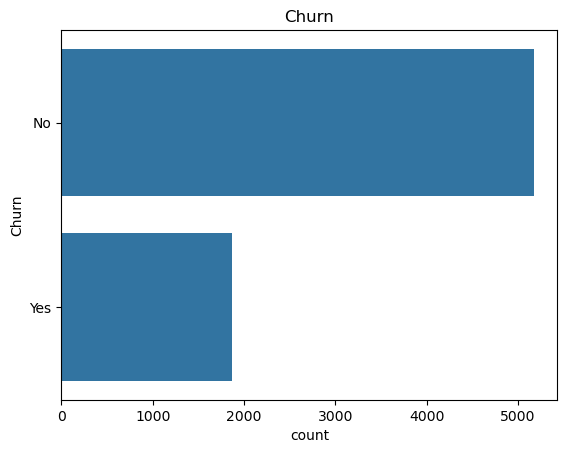

In [11]:
sns.countplot(data['Churn'])
plt.title("Churn")
plt.show()

In [12]:
numerical_feature = {feature for feature in data.columns if data[feature].dtypes != 'O'}
print(f"the number of numerical_feature:{len(numerical_feature)}")
print(f"The numerical featurs are{numerical_feature}")

the number of numerical_feature:4
The numerical featurs are{'SeniorCitizen', 'MonthlyCharges', 'tenure', 'TotalCharges'}


In [13]:
categorical_feature = {feature for feature in data.columns if data[feature].dtypes == 'O'}
print(f"the number of categorical_feature:{len(categorical_feature)}")
print(f"The categorical featurs are:\n{categorical_feature}")

the number of categorical_feature:16
The categorical featurs are:
{'gender', 'PhoneService', 'Partner', 'InternetService', 'Contract', 'Dependents', 'Churn', 'TechSupport', 'OnlineSecurity', 'StreamingMovies', 'PaymentMethod', 'StreamingTV', 'MultipleLines', 'DeviceProtection', 'PaperlessBilling', 'OnlineBackup'}


In [14]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
data.fillna(data['TotalCharges'].median(),inplace = True)

In [16]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
l1 = data.loc[data['Churn'] == 'Yes'].count()[0]
print(f"pecentage of left{l1/len(data['Churn'])}")
print(data.Churn.value_counts())

pecentage of left0.2653698707936959
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [18]:
loss = []
for values in data.loc[data['Churn'] == 'Yes','TotalCharges']:
    values = float(values)
    loss.append(values)
print(np.round(sum(loss)))

2862927.0


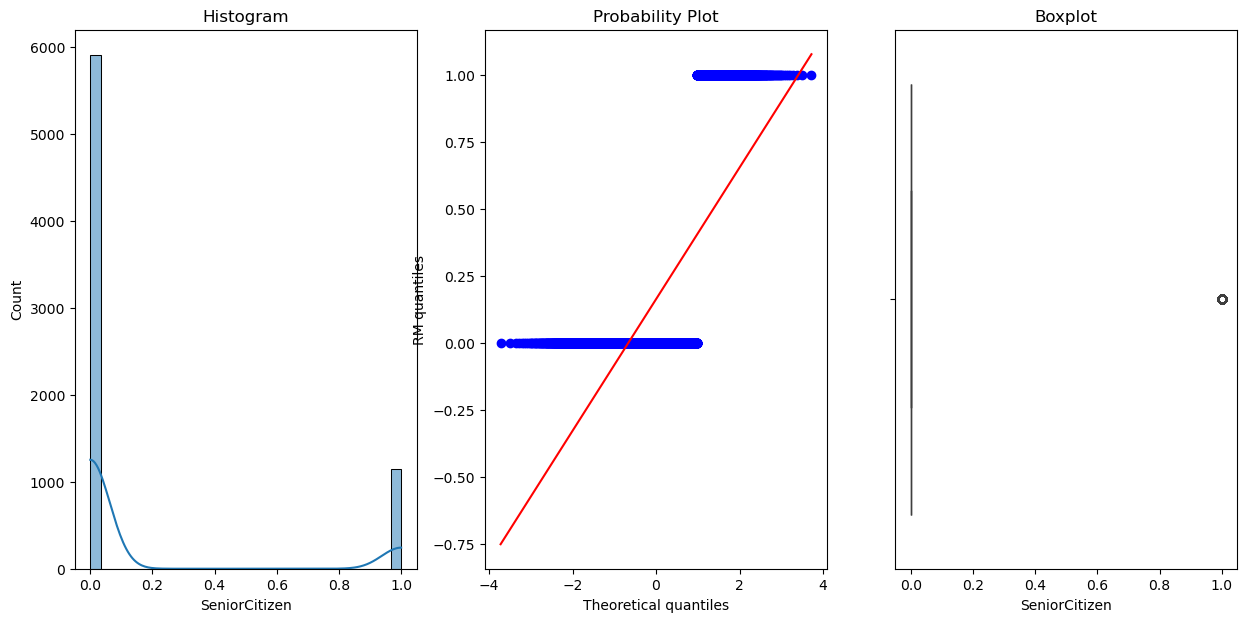

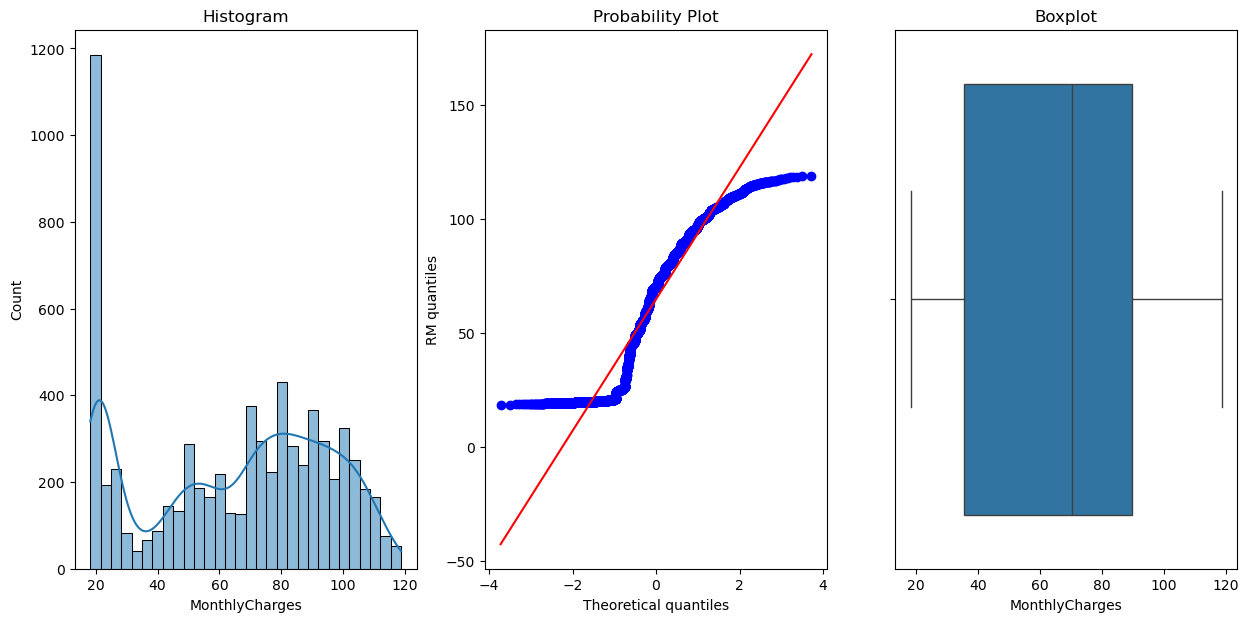

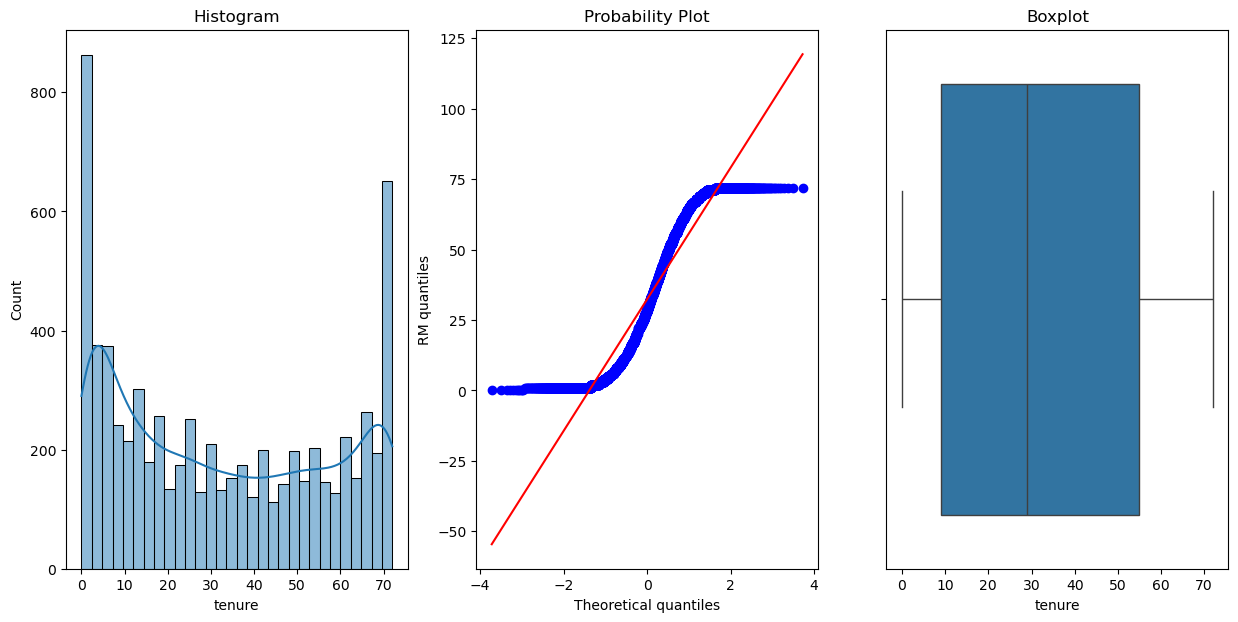

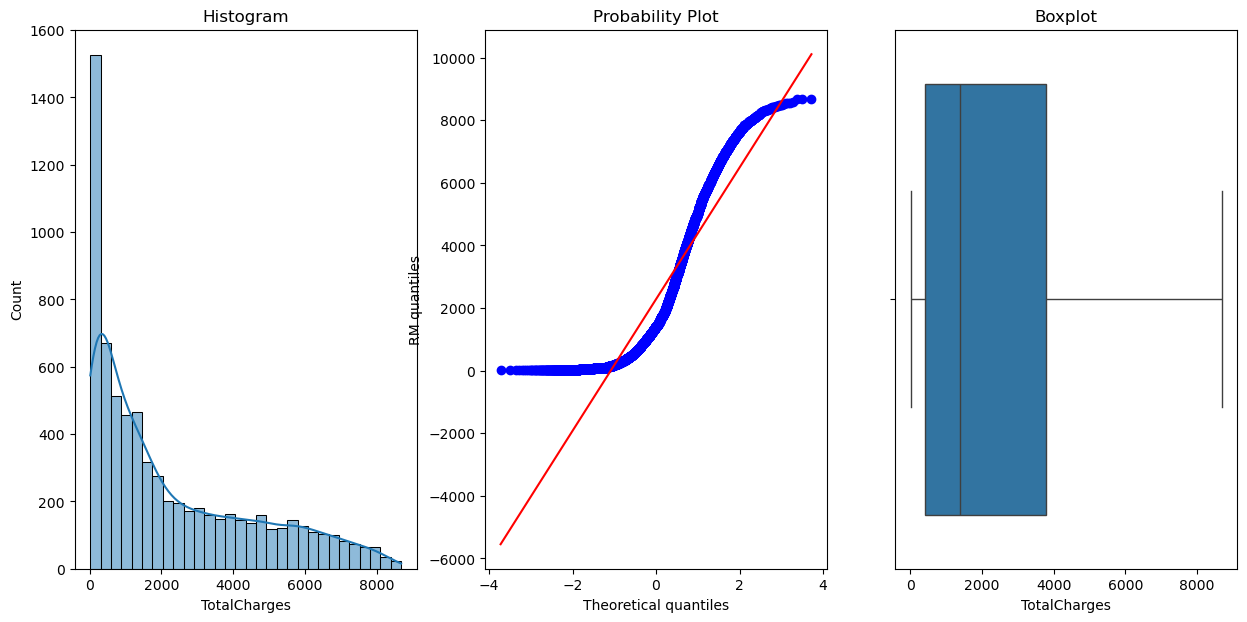

In [19]:
for feature in numerical_feature:
    if feature != 'SenoirCitizen':
        plt.figure(figsize = (15,7))

        plt.subplot(1,3,1)
        sns.histplot(data = data,x = feature,bins = 30,kde = True)
        plt.title('Histogram')

        plt.subplot(1,3,2)
        stats.probplot(data[feature],dist = "norm",plot = plt)
        plt.ylabel('RM quantiles')

        plt.subplot(1,3,3)
        sns.boxplot(x = data[feature])
        plt.title('Boxplot')
plt.show()

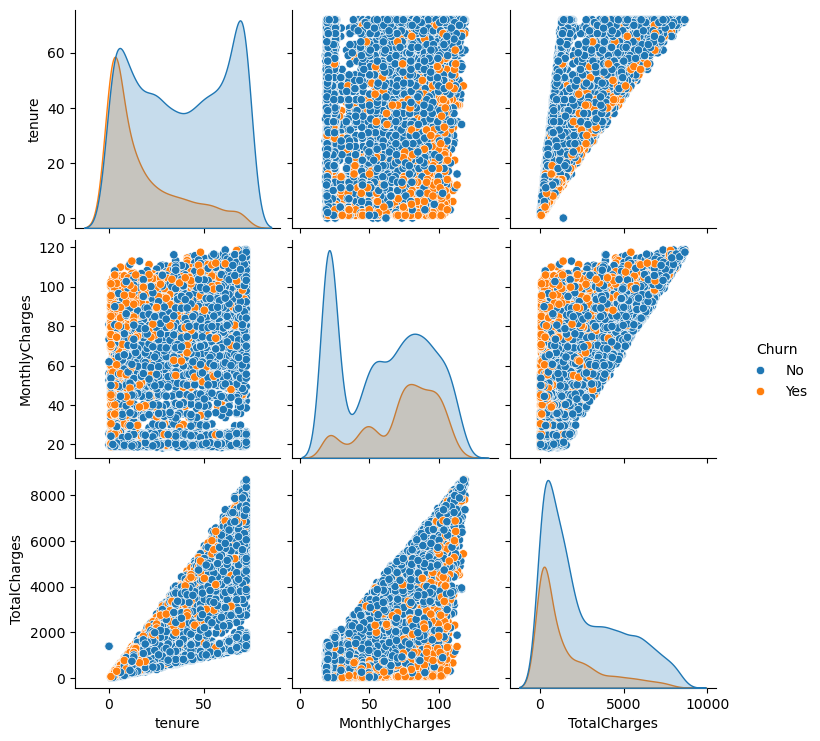

In [20]:
sns.pairplot(data.drop(columns = 'SeniorCitizen'),hue = 'Churn',kind = 'scatter')
plt.show()

Text(0.5, 1.0, '% of Senior Citizens')

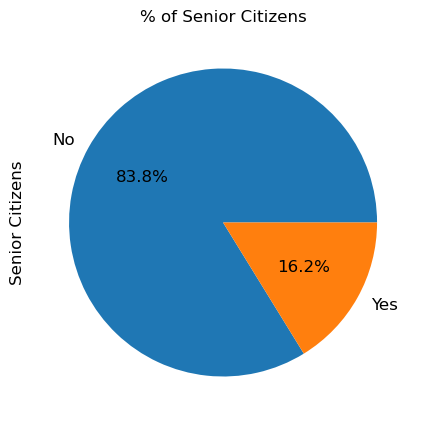

In [21]:
ax = (data['SeniorCitizen'].value_counts()*100.0/len(data)).plot.pie(autopct = '%.1f%%',labels = ['No','Yes'],figsize = (5,5),fontsize = 12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

<Figure size 640x480 with 0 Axes>

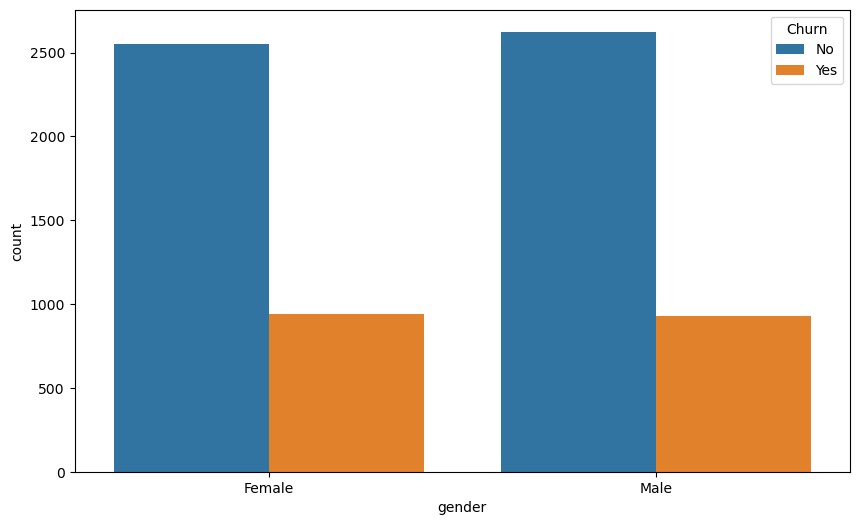

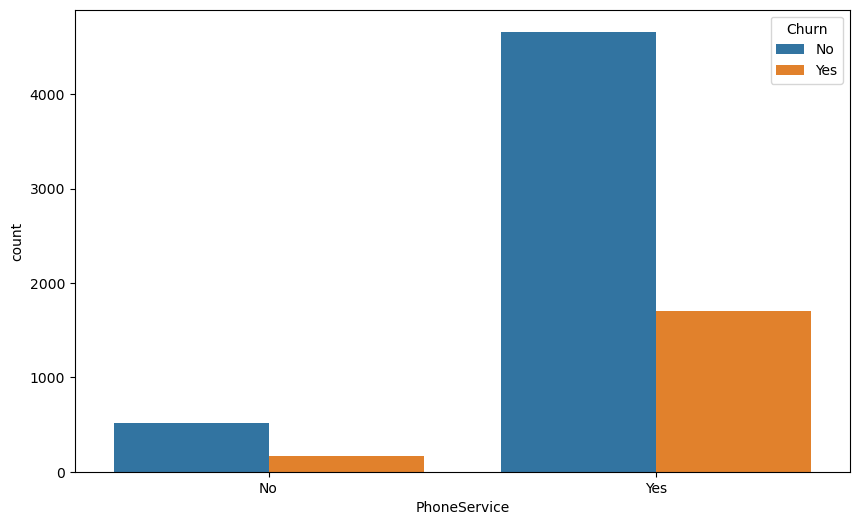

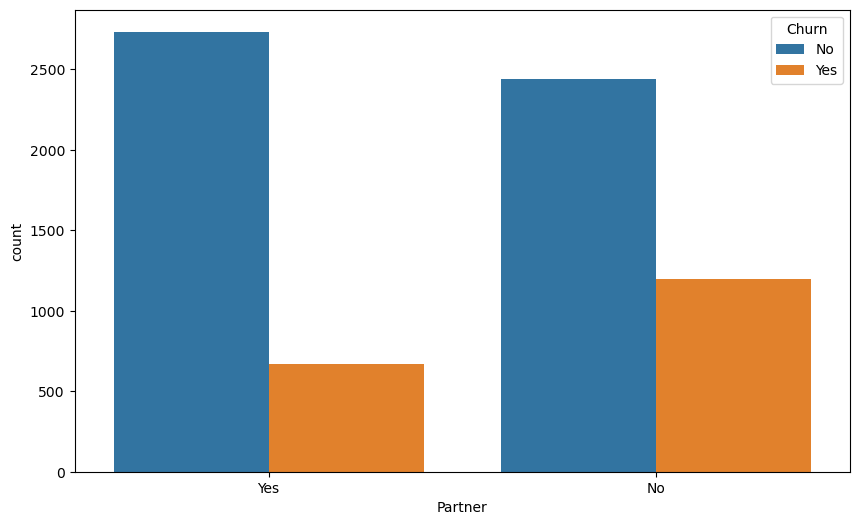

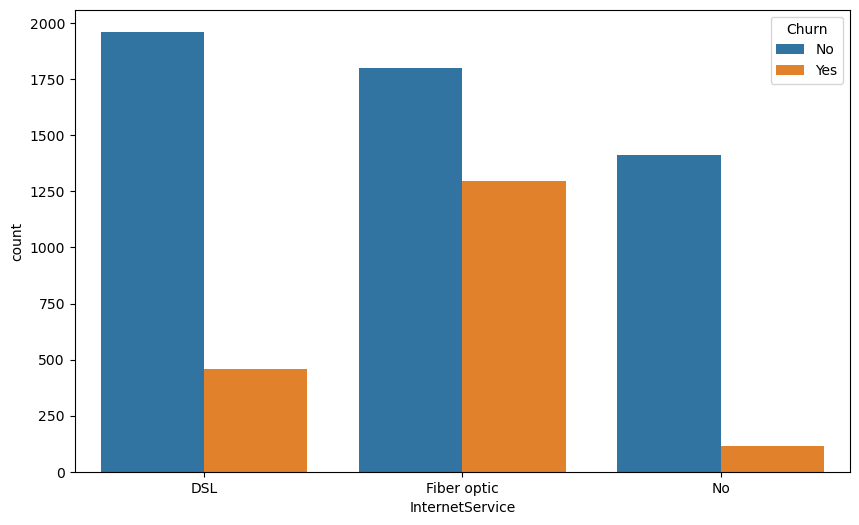

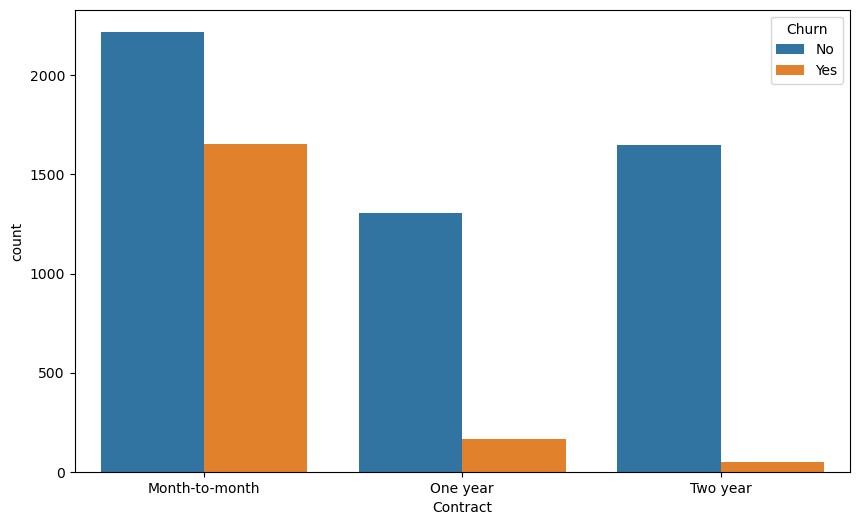

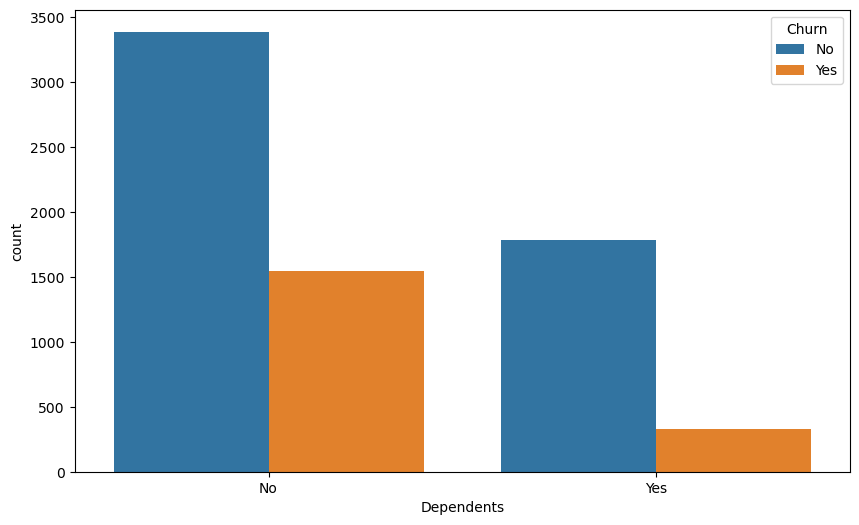

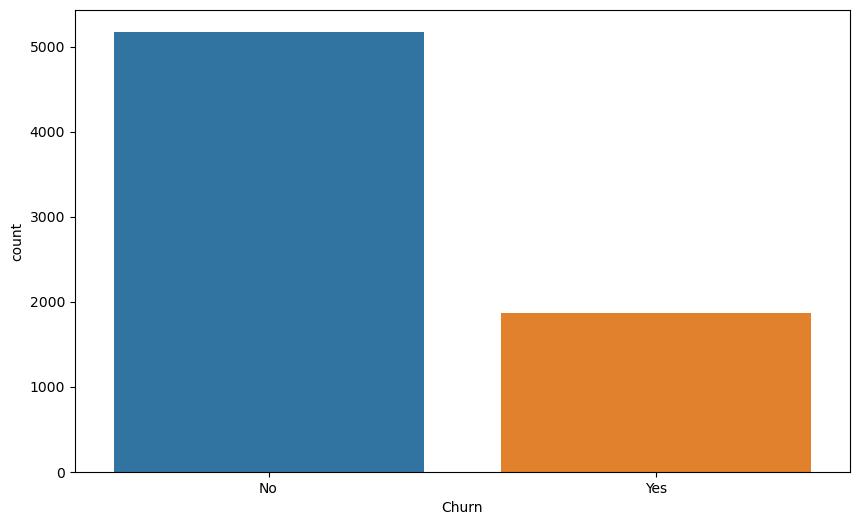

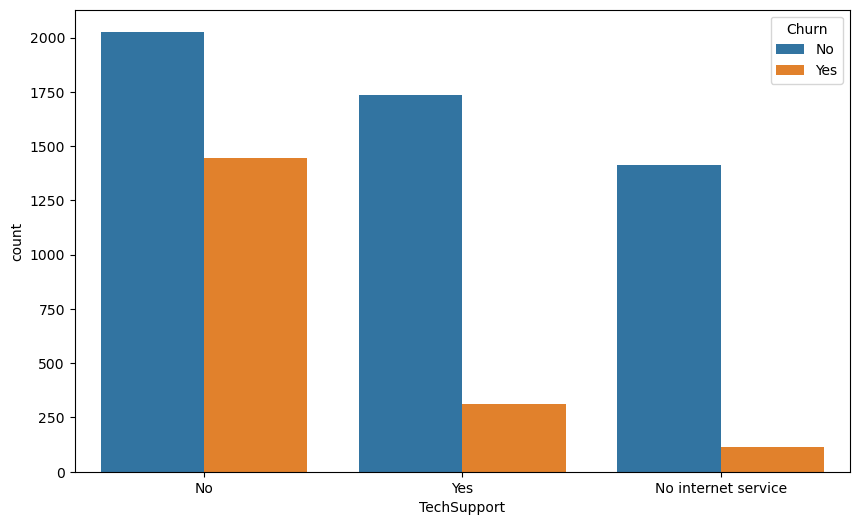

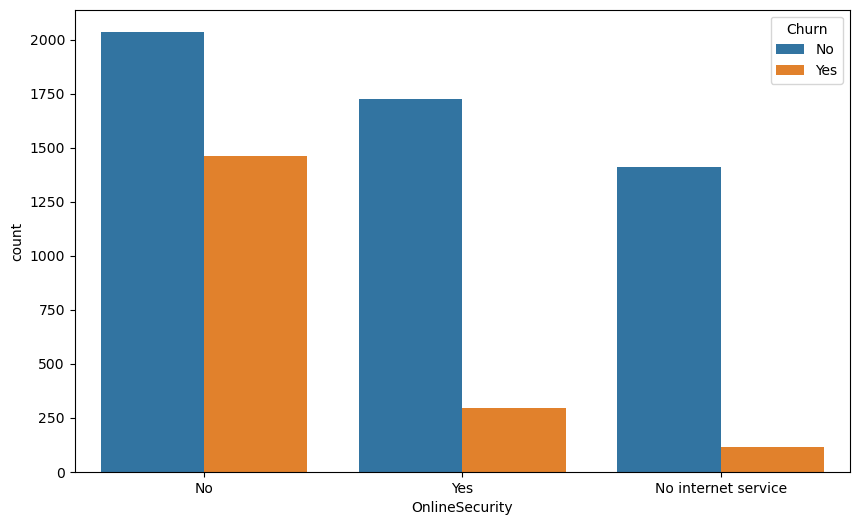

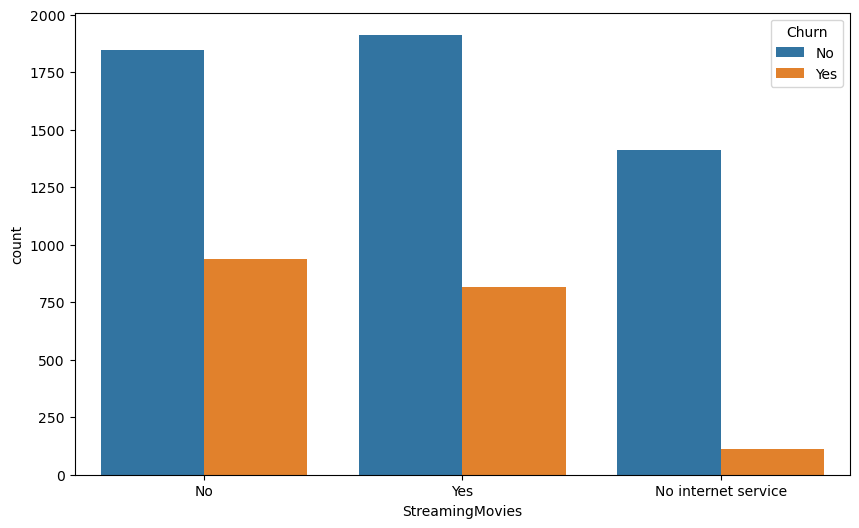

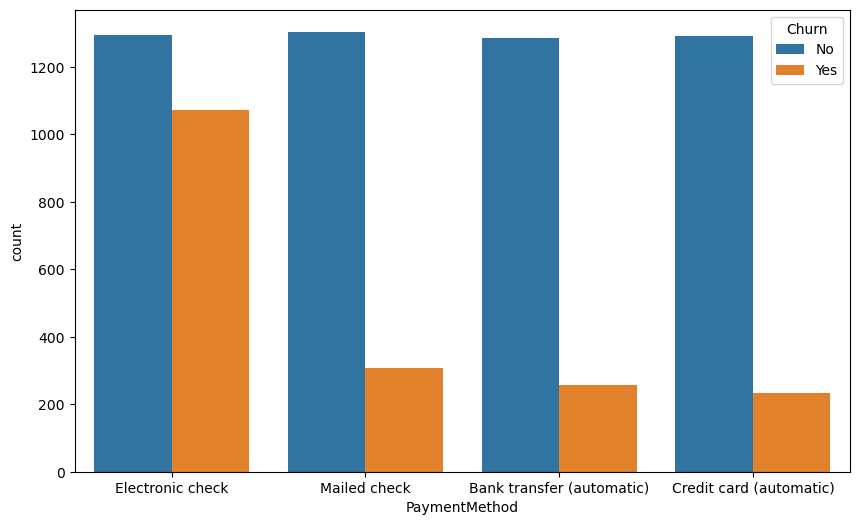

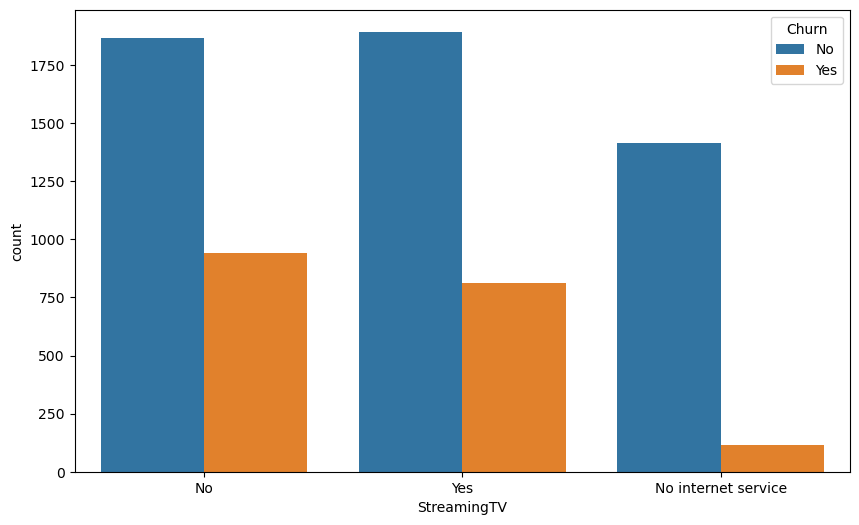

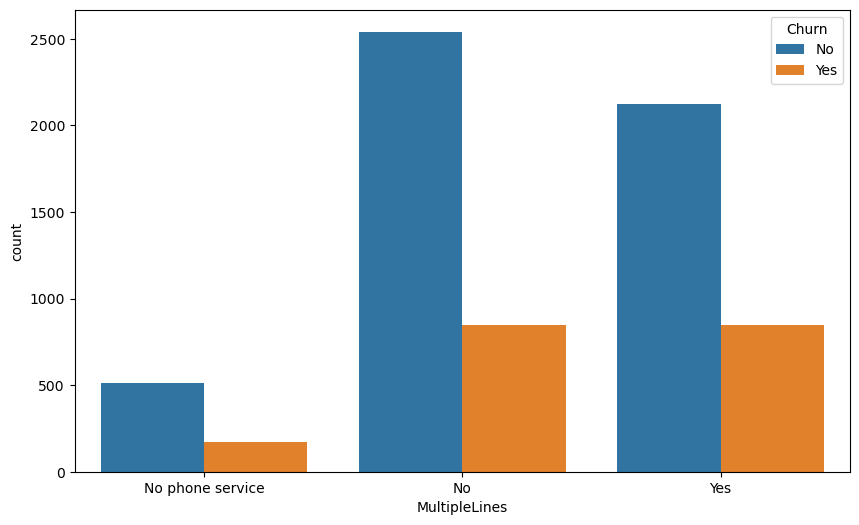

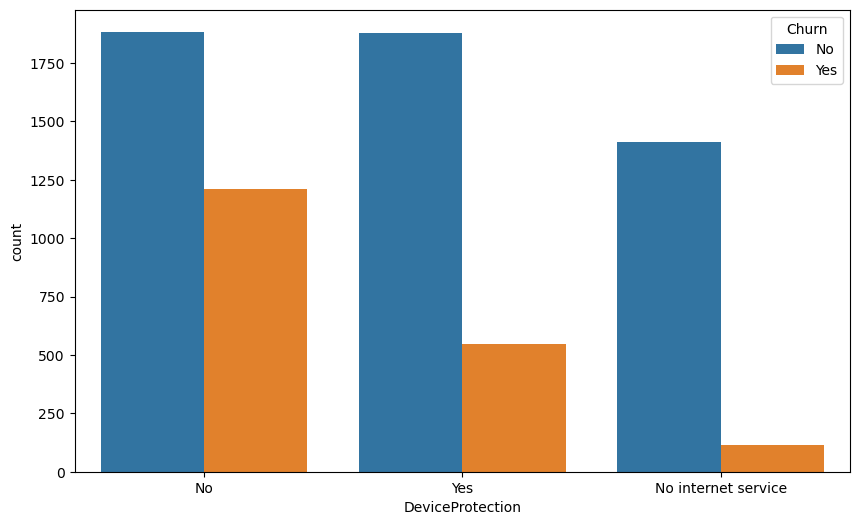

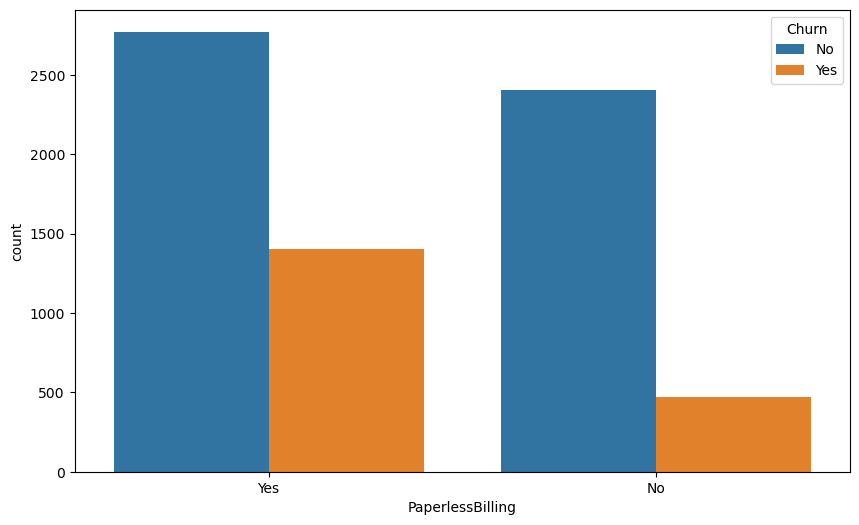

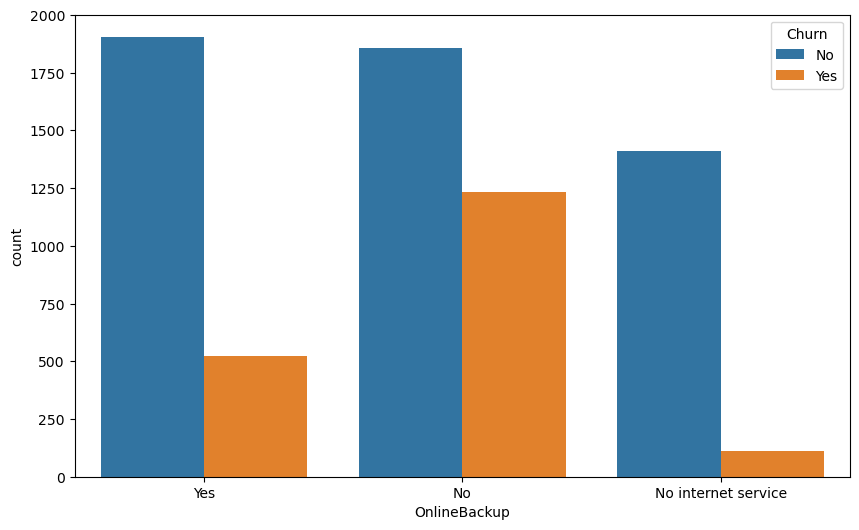

In [22]:
for i, feature in enumerate(categorical_feature):
    if feature != 'TotalCharges':
        plt.figure(i)
        plt.figure(figsize = (10,6))
        sns.countplot(data = data , x = feature,hue = 'Churn')
plt.show()

<Axes: >

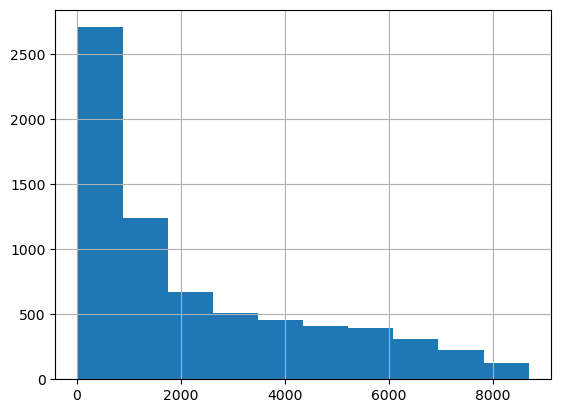

In [23]:
data.TotalCharges.hist()

In [24]:
print(categorical_feature)

{'gender', 'PhoneService', 'Partner', 'InternetService', 'Contract', 'Dependents', 'Churn', 'TechSupport', 'OnlineSecurity', 'StreamingMovies', 'PaymentMethod', 'StreamingTV', 'MultipleLines', 'DeviceProtection', 'PaperlessBilling', 'OnlineBackup'}


In [25]:
LE = LabelEncoder()
for feature in categorical_feature:
    data[feature] = LE.fit_transform(data[feature])

In [26]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<Axes: >

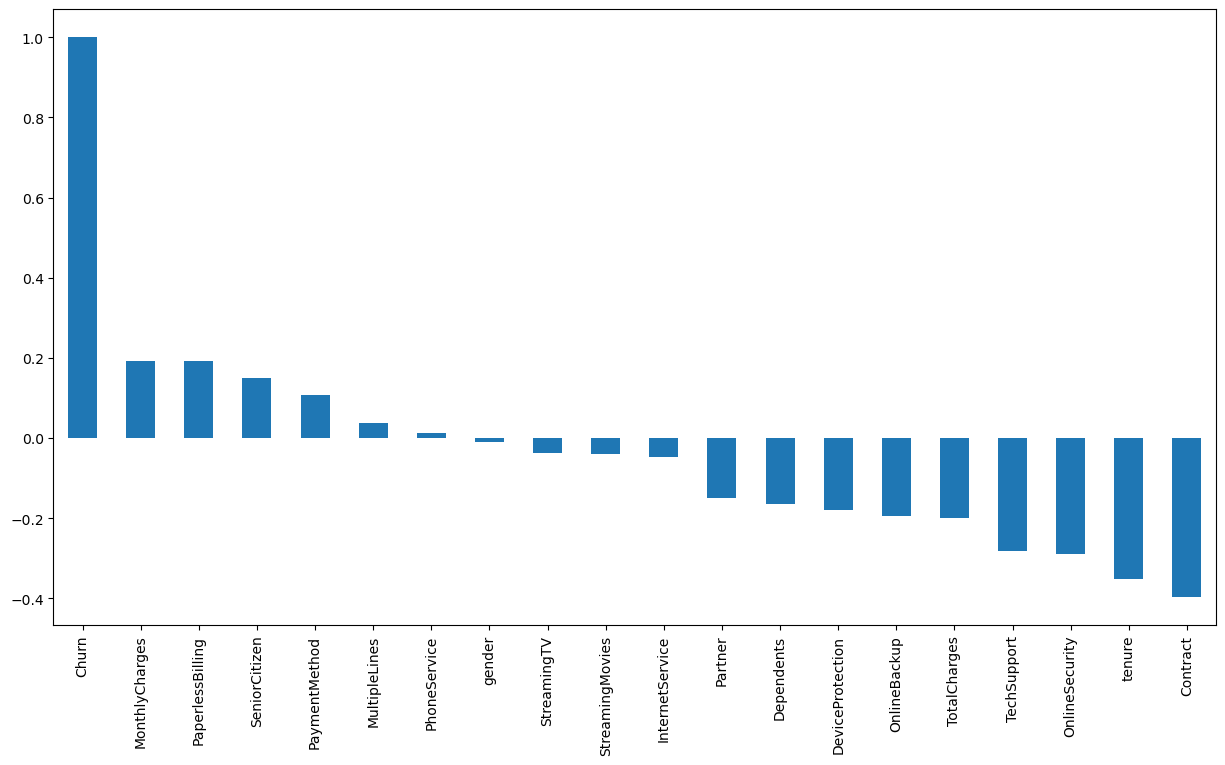

In [27]:
plt.figure(figsize = (15,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

<Axes: >

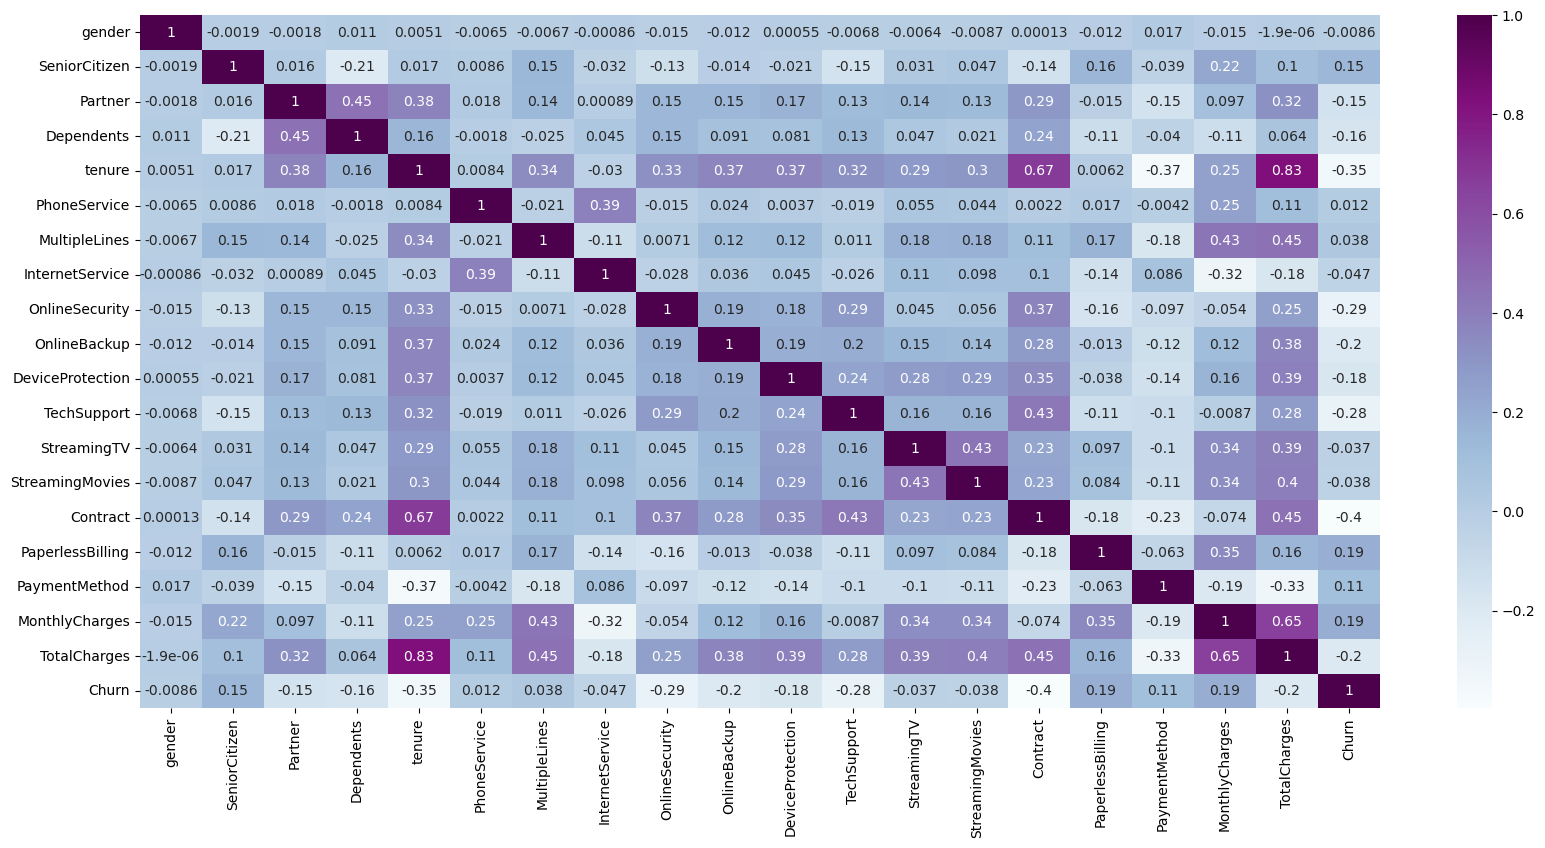

In [28]:
plt.figure(figsize = (20,9))
sns.heatmap(data.corr(),annot = True,cmap = 'BuPu')

In [29]:
X = data.drop(columns = 'Churn')
y = data['Churn']

In [30]:
X.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15


In [31]:
y.head(3)

0    0
1    0
2    1
Name: Churn, dtype: int64

Select only 10 Features which has higher correlation

In [32]:
select = SelectKBest()
X = select.fit_transform(X,y)

In [33]:
select.get_support()

array([False, False, False,  True,  True, False, False, False,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True])

###Out of 21 features 10 features are selected

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5634, 10), (1409, 10), (5634,), (1409,))

In [35]:
X_train.shape

(5634, 10)

Apply into Machine Learning Algorithms

In [36]:
log_model = LogisticRegression(C = 150,max_iter = 150)
log_model.fit(X_train,y_train)
yhat_test = log_model.predict(X_test)

print(f"The accuracy is {accuracy_score(y_test,yhat_test)}")
print(f"The classification report is: \n {classification_report(y_test,yhat_test)}")
print(f"The Confusion matrix of model is: \n{confusion_matrix(y_test,yhat_test)}")

The accuracy is 0.8161816891412349
The classification report is: 
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

The Confusion matrix of model is: 
[[935 101]
 [158 215]]


In [37]:
##Random Forest Classifier
random = RandomForestClassifier(n_estimators = 150,criterion = 'gini',max_depth = 15,min_samples_leaf = 10,min_samples_split = 5)
random.fit(X_train,y_train)
rfc = random.predict(X_test)

print(f"The accuracy is {accuracy_score(y_test,rfc)}")
print(f"The classification report is: \n {classification_report(y_test,rfc)}")
print(f"The Confusion matrix of model is: \n{confusion_matrix(y_test,rfc)}")

The accuracy is 0.8076650106458482
The classification report is: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.68      0.51      0.58       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409

The Confusion matrix of model is: 
[[949  87]
 [184 189]]


In [38]:
##Decision Tree Classifier 
dtc = DecisionTreeClassifier(criterion = 'gini',splitter = 'random',min_samples_leaf = 15)
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)

print(f"The accuracy is {accuracy_score(y_test,dtc_pred)}")
print(f"The classification report is: \n {classification_report(y_test,dtc_pred)}")
print(f"The Confusion matrix of model is: \n{confusion_matrix(y_test,dtc_pred)}")

The accuracy is 0.7955997161107168
The classification report is: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.67      0.46      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

The Confusion matrix of model is: 
[[950  86]
 [202 171]]


As we compare to the imbalance DataSet our model is performing like ok not a better model to build for end to end project so we need to over sampling the data ro reduce the TN,FN and ti increase TP,FP for model Building 

Over Sampling Usimg SMOTE and cleaning using ENN .combine over and under sampling using SMOTE and edited nearnest neighbours

In [39]:
st = SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 4138, 1: 1496})
The number of classes after fit Counter({1: 2418, 0: 2110})


In [40]:
#Splitting the over sampling data set
X_train_sap,X_test_sap,y_train_sap,y_test_sap = train_test_split(X_train_st,y_train_st,test_size = 0.2)
X_train_sap.shape,X_test_sap.shape,y_train_sap.shape,y_test_sap.shape

((3622, 10), (906, 10), (3622,), (906,))

In [41]:
#Decision Tree Classifier 
dtc_sampling = DecisionTreeClassifier(criterion = 'gini',random_state = 100,max_depth = 7,min_samples_leaf = 15)
dtc_sampling.fit(X_train_sap,y_train_sap)
dtc_pred = dtc_sampling.predict(X_test_sap)

print(f"The accuracy is {accuracy_score(y_test_sap,dtc_pred)}")
print(f"The classification report is: \n {classification_report(y_test_sap,dtc_pred)}")
print(f"The Confusion matrix of model is: \n{confusion_matrix(y_test_sap,dtc_pred)}")

The accuracy is 0.9282560706401766
The classification report is: 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       430
           1       0.93      0.94      0.93       476

    accuracy                           0.93       906
   macro avg       0.93      0.93      0.93       906
weighted avg       0.93      0.93      0.93       906

The Confusion matrix of model is: 
[[394  36]
 [ 29 447]]


In [42]:
#Random Forest Classifier
rfc_sampling = RandomForestClassifier(criterion = 'gini',n_estimators = 150,max_depth = 15,min_samples_leaf = 10,min_samples_split = 10)
rfc_sampling.fit(X_train_sap,y_train_sap)
rfc_pred = rfc_sampling.predict(X_test_sap)

print(f"The accuracy is {accuracy_score(y_test_sap,rfc_pred)}")
print(f"The classification report is: \n {classification_report(y_test_sap,rfc_pred)}")
print(f"The Confusion matrix of model is: \n{confusion_matrix(y_test_sap,rfc_pred)}")

The accuracy is 0.9470198675496688
The classification report is: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       430
           1       0.94      0.96      0.95       476

    accuracy                           0.95       906
   macro avg       0.95      0.95      0.95       906
weighted avg       0.95      0.95      0.95       906

The Confusion matrix of model is: 
[[401  29]
 [ 19 457]]


In [43]:
#logistic regression classifier
log_sampling = LogisticRegression(C = 10,max_iter = 150)
log_sampling.fit(X_train_sap,y_train_sap)
log_pred = rfc_sampling.predict(X_test_sap)

print(f"The accuracy is {accuracy_score(y_test_sap,log_pred)}")
print(f"The classification report is: \n {classification_report(y_test_sap,log_pred)}")
print(f"The Confusion matrix of model is: \n{confusion_matrix(y_test_sap,log_pred)}")

The accuracy is 0.9470198675496688
The classification report is: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       430
           1       0.94      0.96      0.95       476

    accuracy                           0.95       906
   macro avg       0.95      0.95      0.95       906
weighted avg       0.95      0.95      0.95       906

The Confusion matrix of model is: 
[[401  29]
 [ 19 457]]


In [44]:
#Gradient Booosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sap,y_train_sap)
gbc_pred  = gbc.predict(X_test_sap)

print(f"The accuracy is {accuracy_score(y_test_sap,gbc_pred)}")
print(f"The classification report is: \n {classification_report(y_test_sap,gbc_pred)}")
print(f"The Confusion matrix of model is: \n{confusion_matrix(y_test_sap,gbc_pred)}")

The accuracy is 0.9492273730684326
The classification report is: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.95       430
           1       0.95      0.95      0.95       476

    accuracy                           0.95       906
   macro avg       0.95      0.95      0.95       906
weighted avg       0.95      0.95      0.95       906

The Confusion matrix of model is: 
[[406  24]
 [ 22 454]]


For GBC we get better TP and FP ratio also increases so we perform hyperparameter tuning for this model only

In [45]:
param_grid = {
    'n_estimators':[100,150,200,250,300],
    'criterion':['friedman_mse','squared_error','mse','mae'],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,3,5,7,9,11,13,15],'max_leaf_nodes': [3,6,8,9,12,15,18,24],
    'max_depth': [3,5,7,9,11,13,15,17,19],
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    'loss': ['deviance', 'exponential']
}

In [46]:
gbc_optm = RandomizedSearchCV(estimator = gbc,param_distributions = param_grid,n_iter = 100,verbose = 3)
gbc_optm.fit(X_train_sap,y_train_sap)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=friedman_mse, learning_rate=0.3, loss=deviance, max_depth=7, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=7, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.3, loss=deviance, max_depth=7, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=7, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.3, loss=deviance, max_depth=7, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=7, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.3, loss=deviance, max_depth=7, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=7, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.3, loss=deviance, max_depth=7, max_leaf_nodes=15, min_samples_leaf=5, min_samples_split=7, n_estimators=300;, score=

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=100,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [3, 5, 7, 9, 11, 13, 15,
                                                      17, 19],
                                        'max_leaf_nodes': [3, 6, 8, 9, 12, 15,
                                                           18, 24],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   verbose=3)

In [64]:
gbc_optm.best_estimator_

GradientBoostingClassifier(loss='exponential', max_depth=13, max_leaf_nodes=24,
                           min_samples_leaf=3, min_samples_split=9,
                           n_estimators=300)

In [48]:
gbc_tuning = GradientBoostingClassifier(criterion = 'squared_error',learning_rate = 0.2,loss = 'exponential',max_depth = 15,max_leaf_nodes = 15,min_samples_split = 10,n_estimators = 250)
gbc_tuning.fit(X_train_sap,y_train_sap)
gbc_tun_pred = gbc_tuning.predict(X_test_sap)

print(f"The accuracy is {accuracy_score(gbc_tun_pred,y_test_sap)}")
print(f"The classification report is: \n {classification_report(gbc_tun_pred,y_test_sap)}")
print(f"The Confusion matrix of model is: \n{confusion_matrix(gbc_tun_pred,y_test_sap)}")

The accuracy is 0.9602649006622517
The classification report is: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       434
           1       0.96      0.97      0.96       472

    accuracy                           0.96       906
   macro avg       0.96      0.96      0.96       906
weighted avg       0.96      0.96      0.96       906

The Confusion matrix of model is: 
[[414  20]
 [ 16 456]]


Now our model is performing pretty Good now we can dumb our model

In [49]:
import pickle

In [50]:
file_name = 'Model.pkl'
pickle.dump(gbc_tuning,open(file_name,'wb'))

In [52]:
load_model = pickle.load(open(file_name, 'rb'))

In [53]:
load_model.score(X_test_sap, y_test_sap)

0.9602649006622517

In [54]:
Dependents = 'Yes'
tenure = 1
OnlineSecurity = 'No'
OnlineBackup = 'Yes'
DeviceProtection = 'No'
TechSupport = 'No'
Contract = 'Month-to-month'
PaperlessBilling = 'No'
MonthlyCharges = 29.85
TotalCharges = 556.85

In [55]:
data = [[Dependents, tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, TotalCharges]]

In [56]:
df = pd.DataFrame(data, columns=['Dependents', 'tenure', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
        'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'])
df.head()
print(df.dtypes)

Dependents           object
tenure                int64
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [57]:
for feature in df.columns:
    if df[feature].dtypes == 'O':
        categorical_feature = feature
        print(categorical_feature)

Dependents
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
Contract
PaperlessBilling


In [58]:
encoder = LabelEncoder()
for feature in df.columns:
    if df[feature].dtypes == 'O':
        df[feature] = encoder.fit_transform(df[feature])

In [59]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,1,0,0,0,0,0,0,29.85,556.85


In [60]:
single = load_model.predict(df)
probability = load_model.predict_proba(df)[:,1]

In [61]:
print(single)

[1]


In [62]:
print(probability)

[0.99290335]


In [63]:
if single == 1:
    print("This Customer is likely to be Churned!")
    print(f"Confidence level is {np.round(probability*100, 2)}")
else:
    print("This Customer is likely to be Continue!")
    print(f"Confidence level is {np.round(probability*100, 2)}")

This Customer is likely to be Churned!
Confidence level is [99.29]
